In [149]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:

tripTrain = pd.read_csv('data/trip_train.csv',
                   usecols=['duration', 'start_date', 'start_station_id', 'subscription_type'])
tripTest = pd.read_csv('data/trip_test.csv',
                   usecols=[ 'start_date', 'start_station_id', 'subscription_type'])
station = pd.read_csv('data/station.csv', usecols=['id','city'])
weather = pd.read_csv('data/weather.csv')

In [4]:
x = pd.read_csv('data/trip.csv',
                   usecols=['id','duration'])
target = pd.read_csv('data/trip_test.csv',
                   usecols=[ 'id'])
testTarget = pd.merge(x,target, how = "inner", on = "id")

In [5]:
testTarget = pd.merge(x,target, how = "inner", on = "id")
testTarget.head()

,id,duration
0,4130,71
1,4498,126
2,4557,130
3,4386,134
4,4242,141


In [61]:
y = pd.read_csv('data/tripsWithWeather.csv')

In [62]:
y.head()

,date,id,duration,station,station_id,subscription_type,time,day_of_week,month,year,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,2013-09-02,8808,827,Market at 4th,76,1,1236,0,9,2013,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,Normal,277.0
1,2013-09-02,8589,27908,Market at 4th,76,1,951,0,9,2013,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,Normal,277.0
2,2013-09-02,9352,610,Market at 4th,76,1,2206,0,9,2013,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,Normal,277.0
3,2013-09-02,8988,7231,Market at 4th,76,1,1431,0,9,2013,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,Normal,277.0
4,2013-09-02,9354,12603,Market at 4th,76,1,2219,0,9,2013,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,Normal,277.0


In [63]:
y.dtypes

date                               object
id                                  int64
duration                            int64
station                            object
station_id                          int64
subscription_type                   int64
time                                int64
day_of_week                         int64
month                               int64
year                                int64
dayofyear                           int64
is_holiday                           bool
zip_code                            int64
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    

In [291]:
yCategories = y.loc[:,['station_id',\
                       'day_of_week',\
                       'year',\
                       'month',\
                       'is_holiday'\
                       ]]
yCategories.head()

,station_id,day_of_week,year,month,is_holiday
0,76,0,2013,9,True
1,76,0,2013,9,True
2,76,0,2013,9,True
3,76,0,2013,9,True
4,76,0,2013,9,True


In [65]:
yNoCategories = y.iloc[:,13:]
yNoCategories['duration'] = y['duration']
yNoCategories.drop(labels = ['events'], inplace = True, axis = 1)
yNoCategories.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,duration
0,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,827
1,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,27908
2,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,610
3,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,7231
4,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,12603


In [90]:
numberEvents(yCategories)

In [292]:
yCategories = encode(yCategories)

In [94]:
yCategories

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [95]:
yNoCategories.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,duration
0,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,827
1,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,27908
2,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,610
3,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,7231
4,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,10.0,10.0,6.0,23.0,12.0,30.0,0.0,6.0,277.0,12603


In [293]:
yNoCategories.shape

(540624, 22)

In [294]:
yCategories.shape

(540624, 94)

In [295]:

trip  = pd.concat([yNoCategories, yCategories], axis=1)

In [296]:
trip.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,84,85,86,87,88,89,90,91,92,93
0,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [297]:
test_target = trip['duration'][-50000:]
test_target.shape

(50000,)

In [298]:
train = trip.iloc[0:trip.shape[0]-50001]

train = train.loc[lambda x: x['duration'] < 10800,:]

train.shape

(484738, 116)

In [299]:
train_target = train['duration']
del train['duration']

In [300]:
test = trip.iloc[-50000:]
del test['duration']

In [350]:
rfr = RandomForestRegressor(n_estimators = 50,
                            n_jobs = -1,
                            min_samples_leaf = 3,
                            random_state = 2,
                           oob_score = True)

In [351]:
train_target.shape

(484738,)

In [352]:
trainPca.shape

(484738, 45)

In [353]:
rfr = rfr.fit(trainPca, train_target)

In [354]:
test_pred = rfr.predict(testPcat)

In [355]:
mean_squared_error(test_target, test_pred)

163101871.35678667

In [338]:
mean_squared_error(test_target, test_pred)

163558604.77327895

In [325]:
mean_squared_error(test_target, test_pred)

163574063.50299433

In [290]:
mean_squared_error(test_target, test_pred)

162786788.49029839

In [279]:
mean_squared_error(test_target, test_pred)

163054034.76533711

In [273]:
mean_squared_error(test_target, test_pred)

162272083.28165105

In [212]:
mean_squared_error(test_target, test_pred)

162494958.99150199

In [198]:
mean_squared_error(test_target, test_pred)

162493722.1381444

In [142]:
mean_squared_error(test_target, test_pred)

162792379.12950158

In [180]:
mean_squared_error(test_target, test_pred)

163428125.16678908

In [184]:
mean_squared_error(test_target, test_pred)

163424495.72178924

In [188]:
mean_squared_error(test_target, test_pred)

163416113.16858044

In [167]:
#Create a plot that ranks the features by importance.
def plot_importances(model, model_name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for feature in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (25,4))
    plt.title("Feature importances of " + model_name)
    plt.bar(range(train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(train.shape[1]), indices)
    plt.xlim([-1, train.shape[1]])
  
    plt.show()

Feature ranking:
(0, 'max_temperature_f')
(1, 'mean_temperature_f')
(2, 'min_temperature_f')
(3, 'max_dew_point_f')
(4, 'mean_dew_point_f')
(5, 'min_dew_point_f')
(6, 'max_humidity')
(7, 'mean_humidity')
(8, 'min_humidity')
(9, 'max_sea_level_pressure_inches')
(10, 'mean_sea_level_pressure_inches')
(11, 'min_sea_level_pressure_inches')
(12, 'max_visibility_miles')
(13, 'mean_visibility_miles')
(14, 'min_visibility_miles')
(15, 'max_wind_Speed_mph')
(16, 'mean_wind_speed_mph')
(17, 'max_gust_speed_mph')
(18, 'precipitation_inches')
(19, 'cloud_cover')
(20, 'wind_dir_degrees')
(21, 0)
(22, 1)
(23, 2)
(24, 3)
(25, 4)
(26, 5)
(27, 6)
(28, 7)
(29, 8)
(30, 9)
(31, 10)
(32, 11)
(33, 12)
(34, 13)
(35, 14)
(36, 15)
(37, 16)
(38, 17)
(39, 18)
(40, 19)
(41, 20)
(42, 21)
(43, 22)
(44, 23)
(45, 24)
(46, 25)
(47, 26)
(48, 27)
(49, 28)
(50, 29)
(51, 30)
(52, 31)
(53, 32)
(54, 33)
(55, 34)
(56, 35)
(57, 36)
(58, 37)
(59, 38)
(60, 39)
(61, 40)
(62, 41)
(63, 42)
(64, 43)
(65, 44)
(66, 45)
(67, 46)
(68, 

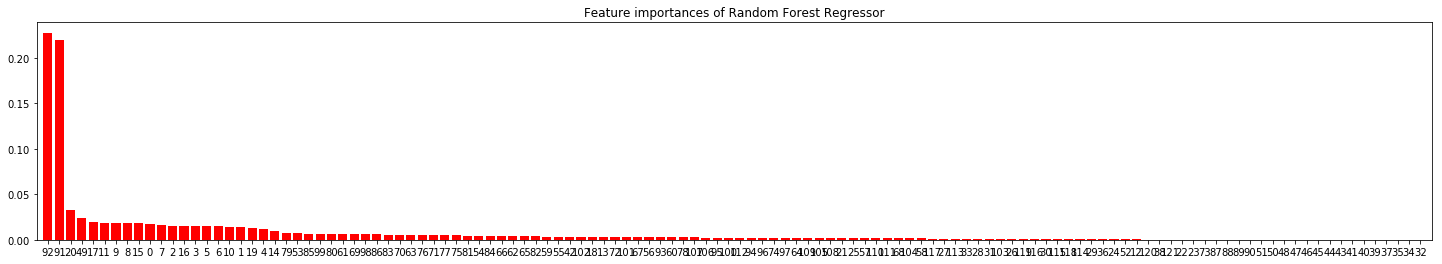

In [168]:
# Print the feature ranking
print("Feature ranking:")

i = 0
for feature in train:
    print (i, feature)
    i += 1
    
plot_importances(rfr, "Random Forest Regressor")

In [175]:
train.iloc[:,0:21]

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees
0,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
2,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
6,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
8,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
9,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
10,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
12,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
13,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
15,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0
16,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,...,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0.000,6.0,277.0


In [217]:
from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

In [348]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 45

print "Extracting the top %d eigenfaces from %d faces" % (n_components, train.shape[0])

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(train)




print "Projecting the input data on the eigenfaces orthonormal basis"

X_train_pca = pca.transform(train)
X_test_pca = pca.transform(test)


Extracting the top 45 eigenfaces from 484738 faces


/Users/Robert/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Projecting the input data on the eigenfaces orthonormal basis


In [349]:
trainPca = pd.DataFrame(X_train_pca)
testPcat = pd.DataFrame(X_test_pca)

In [328]:
trainPca.shape

(484738, 12)

In [329]:
testPcat.shape

(50000, 12)

In [330]:
tt = test.iloc[:,21:].reset_index()
del tt['index']
tr = train.iloc[:,21:].reset_index()
del tr['index']

In [331]:
trainRob = trainPca.join(tr, lsuffix = 'x',rsuffix='y')



In [332]:
testRob = testPcat.join(tt, lsuffix = 'x',rsuffix='y')

In [308]:
testRob

,0x,1x,2x,3x,4x,5x,6x,7x,0y,1y,...,84,85,86,87,88,89,90,91,92,93
0,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-4.451232e+12,-5.189748e+29,-5.488000e+44,4.833302e+49,3.475963e+65,5.602130e+82,-7.117336e+94,-6.497251e+103,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-8.509709e+11,3.835901e+29,-9.222038e+44,7.724416e+49,6.583297e+65,1.194223e+83,-1.986148e+95,-1.038015e+104,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-8.509709e+11,3.835901e+29,-9.222038e+44,7.724416e+49,6.583297e+65,1.194223e+83,-1.986148e+95,-1.038015e+104,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-8.509709e+11,3.835901e+29,-9.222038e+44,7.724416e+49,6.583297e+65,1.194223e+83,-1.986148e+95,-1.038015e+104,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [237]:
testPcat

,0,1,2,3,4,5,6,7
0,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
1,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
2,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
3,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
4,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
5,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
6,-0.210879,-0.605705,0.185839,0.176818,0.878237,-0.225861,1.090631,-1.027490
7,-1.327142,0.003610,0.910892,0.218032,-0.187696,-0.699319,-1.678600,0.022163
8,-1.327142,0.003610,0.910892,0.218032,-0.187696,-0.699319,-1.678600,0.022163
9,-1.327142,0.003610,0.910892,0.218032,-0.187696,-0.699319,-1.678600,0.022163
